# Project Overview: Machine Learning

In this Jupyter notebook, we explore the application of machine learning to the domain of trading, aiming to predict buy and sell signals. Machine learning (ML) is a subset of artificial intelligence (AI) that involves training algorithms on historical data to make predictions or decisions without being explicitly programmed for each specific task. In trading, ML can help identify patterns and make data-driven decisions to enhance trading strategies.

## Machine Learning Models
We will employ three machine learning models to predict trading signals: Logistic Regression, Support Vector Machine (SVM), and XGBoost. Each of these models has unique characteristics and strengths that make them suitable for different aspects of predictive modeling in trading.

### Logistic Regression
Logistic Regression is a statistical model that is commonly used for binary classification tasks. It models the probability that a given input belongs to a particular class. Despite its simplicity, Logistic Regression is powerful for problems where the relationship between the input features and the output can be approximated by a linear decision boundary. In the context of trading, Logistic Regression can help determine the likelihood of a price movement being upward or downward, thus indicating buy or sell signals.

### Support Vector Machine (SVM)
Support Vector Machine is a robust and versatile classification algorithm that aims to find the optimal hyperplane that best separates different classes in the feature space. SVM is particularly effective in high-dimensional spaces and when the classes are not linearly separable, thanks to its ability to use kernel functions. In trading, SVM can be used to classify market conditions or price movements, providing clear signals for buying or selling based on the patterns it learns from historical data.

### XGBoost
XGBoost (Extreme Gradient Boosting) is an advanced implementation of gradient boosting algorithms designed for speed and performance. It builds an ensemble of weak prediction models, typically decision trees, to create a strong overall model. XGBoost is known for its efficiency and accuracy, making it a popular choice for many machine learning competitions. In trading, XGBoost can capture complex patterns and interactions in the data, leading to highly accurate predictions for buy and sell signals.

## Objective
The primary goal of this notebook is to compare these three models—Logistic Regression, SVM, and XGBoost—to determine which one performs best in predicting buy and sell signals for trading. We will evaluate their performance based on various metrics and ultimately identify the model that provides the most reliable predictions.

### Apple stock 1 minute interval
First we are going to test the Machine Learning models and see which one is better. We are going to try 4 different scenarios:
- Each model alone (3 total).
- Using all of them at the same time.

The next code is going to optimize each model and test this 4 scenarios.

It's also important to say, that first we are going to train and test the models with the training datase, splitting 80% train and 20% test.

In [9]:
from M_L import Operation, TradingStrategy
strategy = TradingStrategy('A1')
strategy.optimize_and_fit_models()
strategy.run_combinations()

[I 2024-06-17 13:13:42,621] A new study created in memory with name: no-name-a2374ba4-3d7e-406a-970f-a7800572e0a0
[I 2024-06-17 13:14:21,431] Trial 0 finished with value: 0.5343023255813953 and parameters: {'C': 0.04665624574958705, 'l1_ratio': 0.5109659162145357, 'fit_intercept': True}. Best is trial 0 with value: 0.5343023255813953.
[I 2024-06-17 13:14:24,099] Trial 1 finished with value: 0.5311096856959591 and parameters: {'C': 0.00026984618760339833, 'l1_ratio': 0.23343636381644142, 'fit_intercept': False}. Best is trial 0 with value: 0.5343023255813953.
[I 2024-06-17 13:14:24,341] Trial 2 finished with value: 0.0 and parameters: {'C': 9.375812292708348e-06, 'l1_ratio': 0.8994929033315151, 'fit_intercept': True}. Best is trial 0 with value: 0.5343023255813953.
[I 2024-06-17 13:15:07,774] Trial 3 finished with value: 0.533240434302967 and parameters: {'C': 12.025161031936662, 'l1_ratio': 0.26368222717448647, 'fit_intercept': False}. Best is trial 0 with value: 0.5343023255813953.
[I

Using: ['Logistic'] for ML
Using: ['XGBoost'] for ML
Using: ['SVM'] for ML
Using: ['Logistic', 'XGBoost', 'SVM'] for ML
The best one was: ['Logistic'] with a value of: 760394.1752124493


Let's see the performance of how we did on a graph.

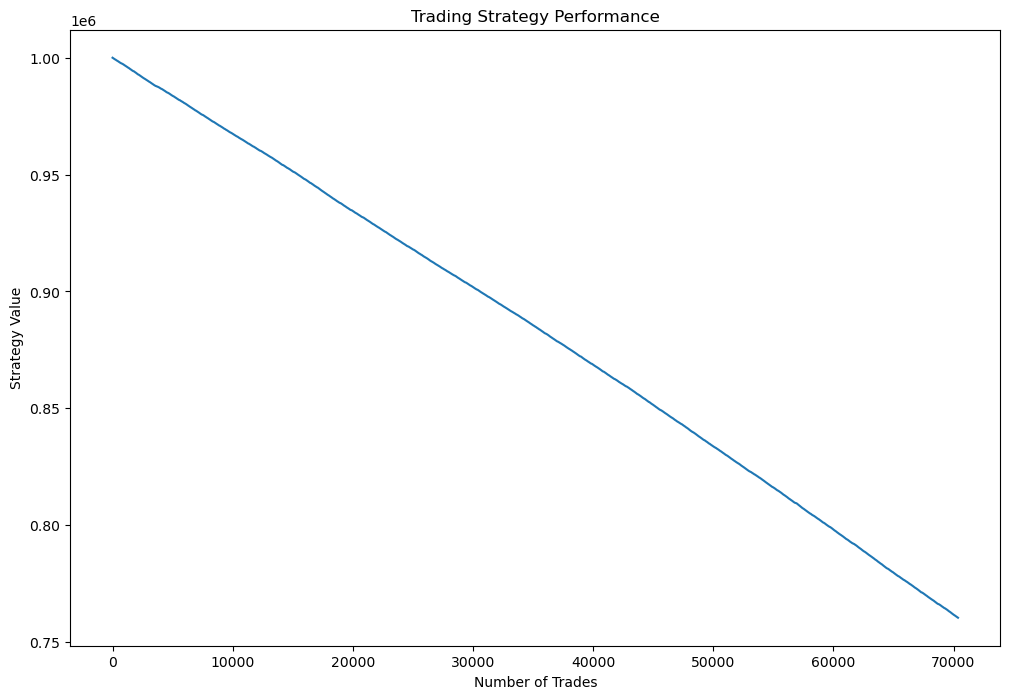

In [10]:
strategy.plot_results(best = True)

Let's optimize our Stop Loss, Take Profit and Number of Shares. Looking to get a better performance.

In [11]:
strategy.optimize_trade_parameters()

[I 2024-06-17 14:17:38,547] A new study created in memory with name: no-name-8adefce0-b87c-478c-95b8-6ff281a696b5
[I 2024-06-17 14:18:03,991] Trial 0 finished with value: -358509.5465474623 and parameters: {'stop_loss_pct': 0.8492154513365081, 'take_profit_pct': 1.1171090200194511, 'n_shares': 85}. Best is trial 0 with value: -358509.5465474623.
[I 2024-06-17 14:18:29,900] Trial 1 finished with value: -263031.0529624935 and parameters: {'stop_loss_pct': 0.8777065371595635, 'take_profit_pct': 1.1136290969014095, 'n_shares': 75}. Best is trial 1 with value: -263031.0529624935.
[I 2024-06-17 14:18:51,938] Trial 2 finished with value: -953794.3289114538 and parameters: {'stop_loss_pct': 0.8860985301697677, 'take_profit_pct': 1.0567141423020687, 'n_shares': 146}. Best is trial 1 with value: -263031.0529624935.
[I 2024-06-17 14:19:14,228] Trial 3 finished with value: -767437.5205024596 and parameters: {'stop_loss_pct': 0.8300521310345722, 'take_profit_pct': 1.1350340290165866, 'n_shares': 12

Best params: {'stop_loss_pct': 0.8014349044673801, 'take_profit_pct': 1.0681765633337084, 'n_shares': 50}


Let's see it on a graph.

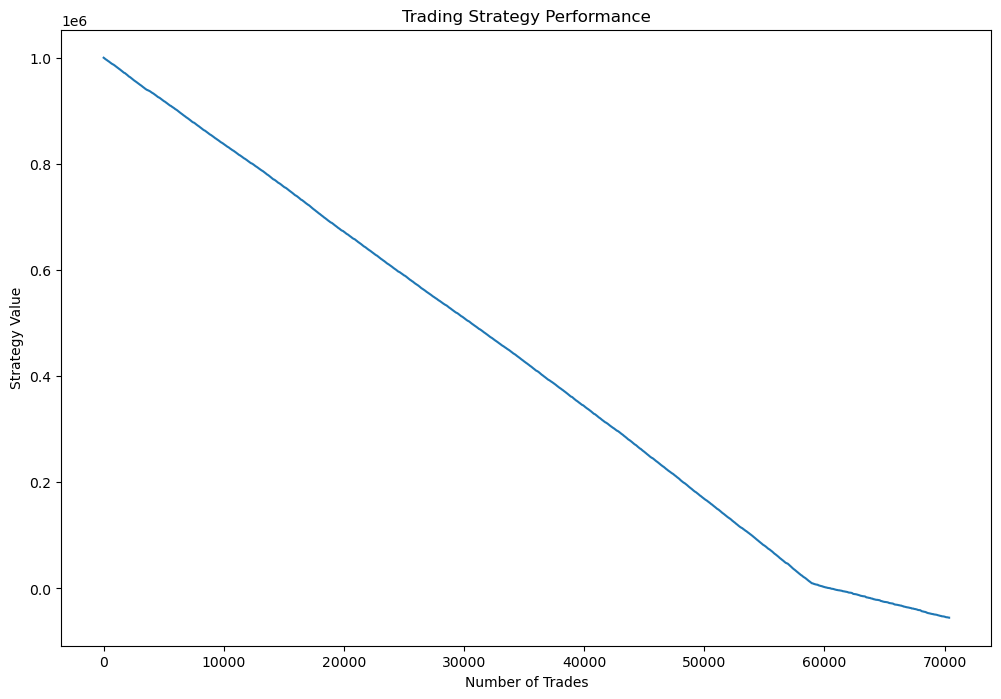

In [12]:
strategy.plot_results(best = True)

Now that we got our best model, we are going to train it on the whole training dataset and then test it on the test dataset. To see if the model is good or not.

Buy Signal Accuracy: 1.0
Buy Signal F1 Score: 1.0
Sell Signal Accuracy: 1.0
Sell Signal F1 Score: 1.0
Final Portfolio Value: -594739.7784874925


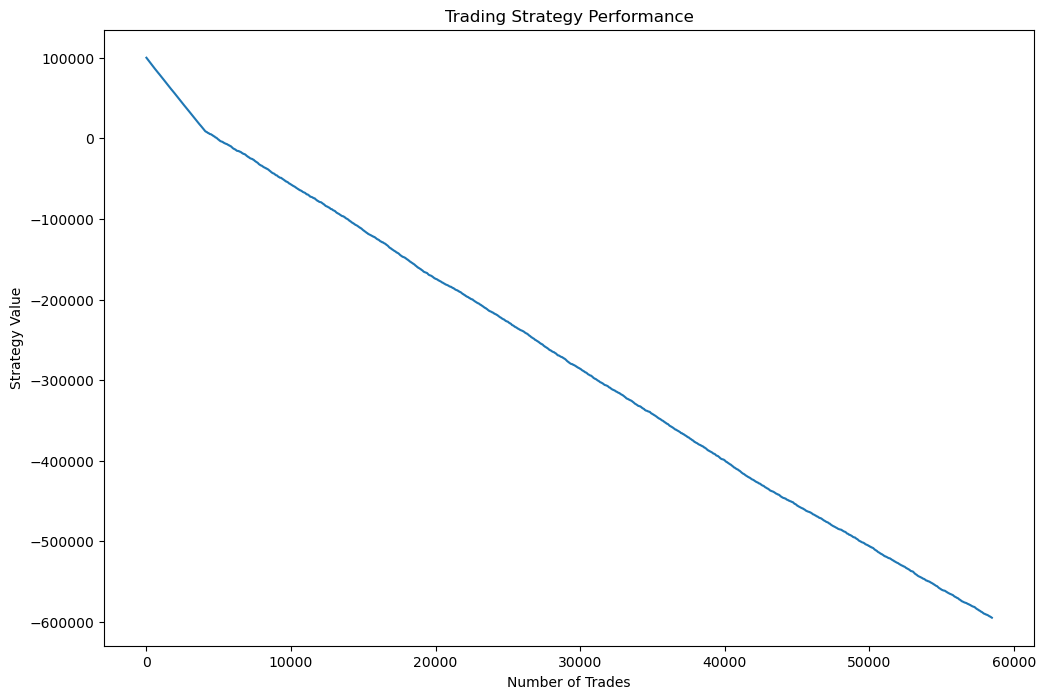

In [13]:
from ML_Test import Operation, TradingStrategy

strategy = TradingStrategy(train_path="data/aapl_project_1m_train.csv", test_path="data/aapl_project_1m_test.csv")
strategy.train_model()
strategy.plot_results()

#### Passive vs Active
Lets compare it with a passive strategy.

The passive asset return is: -9.95%
The trading strategy return is: -159.47%


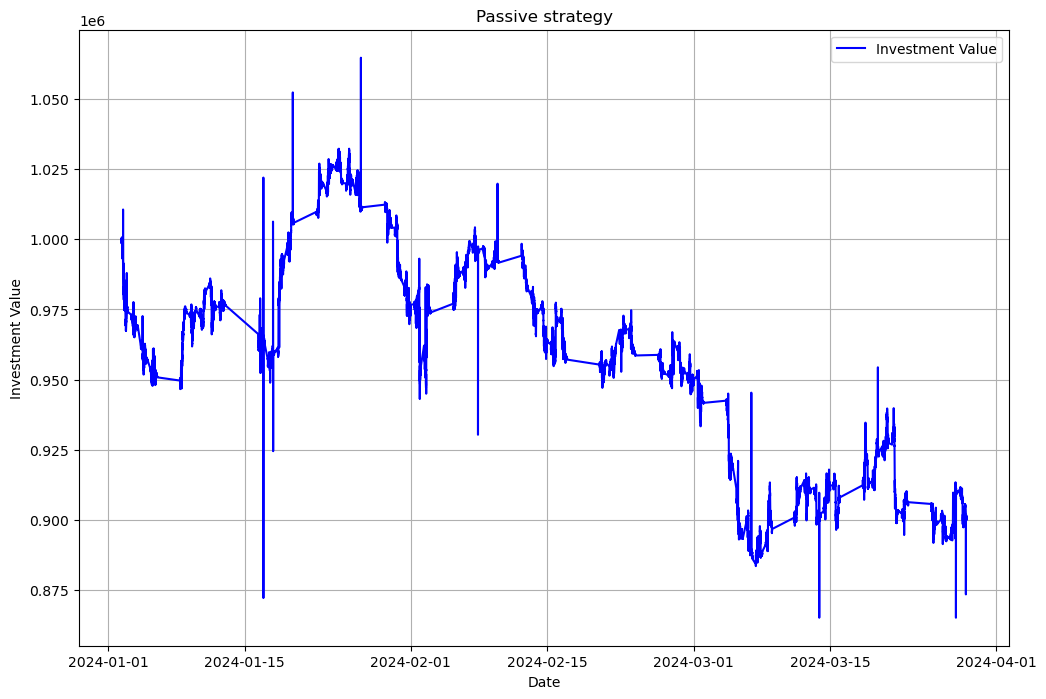

The final value of the investment: $900,528.64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data/aapl_project_1m_test.csv")
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Get first and last close data
primer_cierre = data.iloc[0]['Close']
ultimo_cierre = data.iloc[-1]['Close']

# Get asset yeild
rend_pasivo = (ultimo_cierre - primer_cierre) / primer_cierre
print("The passive asset return is: {:.2%}".format(rend_pasivo))

# Compare with used strategy
cash = 1000000
cashfinal = -594739.7784874925 # Change this to the value gotten on the trading strategy of the last code.
rend_estrategia = (cashfinal - cash) / cash
print("The trading strategy return is: {:.2%}".format(rend_estrategia))

# Sort data
data = data.sort_values(by='Datetime')

# Rend
data['Returns'] = data['Close'].pct_change().fillna(0)

# See the value passive
initial_investment = cash
data['Investment_Value'] = (1 + data['Returns']).cumprod() * initial_investment

# Graficar el rendimiento de la inversión
plt.figure(figsize=(12, 8))
plt.plot(data['Datetime'], data['Investment_Value'], label='Investment Value', color='blue')
plt.title('Passive strategy')
plt.xlabel('Date')
plt.ylabel('Investment Value')
plt.legend()
plt.grid(True)
plt.show()

valor_final = data['Investment_Value'].iloc[-1]
print("The final value of the investment: ${:,.2f}".format(valor_final))

### Apple stock 5 minutes interval
First we are going to test the Machine Learning models and see which one is better. We are going to try 4 different scenarios:
- Each model alone (3 total).
- Using all of them at the same time.

The next code is going to optimize each model and test this 4 scenarios.

It's also important to say, that first we are going to train and test the models with the training datase, splitting 75% train and 25% test.

In [1]:
from M_L import Operation, TradingStrategy
strategy = TradingStrategy('A5')
strategy.optimize_and_fit_models()
strategy.run_combinations()

[I 2024-06-16 01:15:47,271] A new study created in memory with name: no-name-f44de71a-d1a5-4403-b0cf-ba2d3160aef9
[I 2024-06-16 01:16:21,374] Trial 0 finished with value: 0.6138409020378608 and parameters: {'C': 10.798782352925077, 'l1_ratio': 0.1619243623591161, 'fit_intercept': False}. Best is trial 0 with value: 0.6138409020378608.
[I 2024-06-16 01:16:54,520] Trial 1 finished with value: 0.6139044072004965 and parameters: {'C': 23.200985990553246, 'l1_ratio': 0.008894748034002387, 'fit_intercept': False}. Best is trial 1 with value: 0.6139044072004965.
[I 2024-06-16 01:17:28,125] Trial 2 finished with value: 0.6137774100124122 and parameters: {'C': 6348.190284181933, 'l1_ratio': 0.5876600938895096, 'fit_intercept': True}. Best is trial 1 with value: 0.6139044072004965.
[I 2024-06-16 01:17:28,188] Trial 3 finished with value: 0.691343384719634 and parameters: {'C': 1.457453310396601e-06, 'l1_ratio': 0.69515973069759, 'fit_intercept': True}. Best is trial 3 with value: 0.6913433847196

Using: ['Logistic'] for ML
Using: ['XGBoost'] for ML
Using: ['SVM'] for ML
Using: ['Logistic', 'XGBoost', 'SVM'] for ML
The best one was: ['SVM'] with a value of: 899016.059640644


Let's see the performance of how we did on a graph.

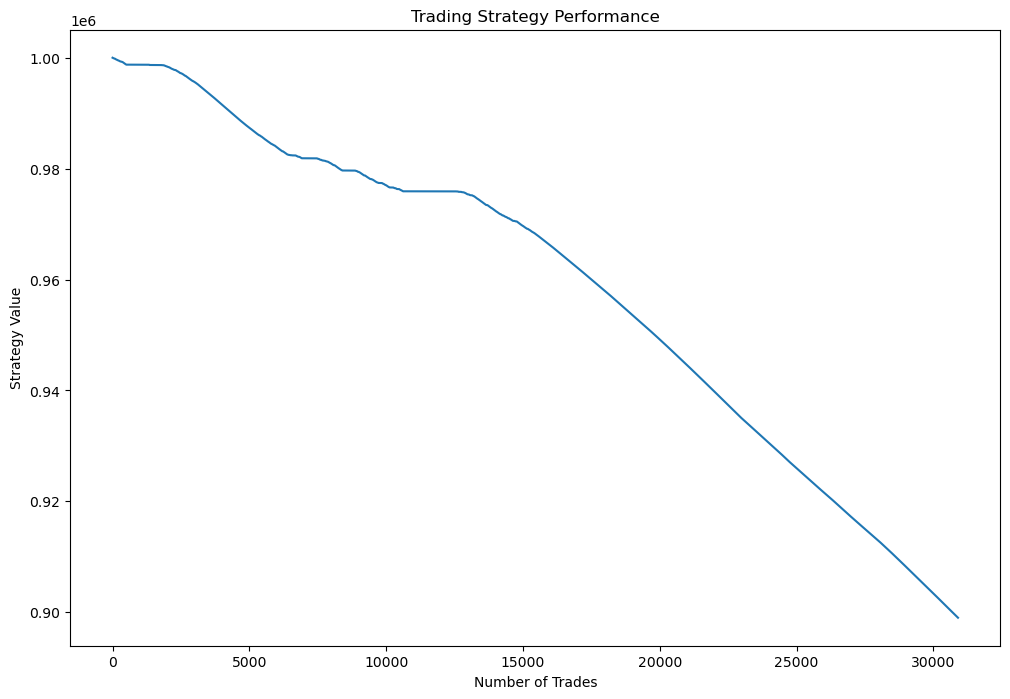

In [2]:
strategy.plot_results(best = True)

Let's optimize our Stop Loss, Take Profit and Number of Shares. Looking to get a better performance.

In [3]:
strategy.optimize_trade_parameters()

[I 2024-06-16 01:55:50,501] A new study created in memory with name: no-name-e389b90d-90c2-468d-94d7-89cd671bfb8d
[I 2024-06-16 01:55:55,931] Trial 0 finished with value: 19100.17325108337 and parameters: {'stop_loss_pct': 0.9091952763767873, 'take_profit_pct': 1.0804289395019409, 'n_shares': 116}. Best is trial 0 with value: 19100.17325108337.
[I 2024-06-16 01:56:01,168] Trial 1 finished with value: 19642.79943228882 and parameters: {'stop_loss_pct': 0.9265319714196084, 'take_profit_pct': 1.0612318523199467, 'n_shares': 113}. Best is trial 1 with value: 19642.79943228882.
[I 2024-06-16 01:56:05,991] Trial 2 finished with value: 24245.22473159919 and parameters: {'stop_loss_pct': 0.9303715201382311, 'take_profit_pct': 1.1183768809438033, 'n_shares': 147}. Best is trial 2 with value: 24245.22473159919.
[I 2024-06-16 01:56:11,242] Trial 3 finished with value: 373899.56977204897 and parameters: {'stop_loss_pct': 0.9232949966781832, 'take_profit_pct': 1.1464050717577763, 'n_shares': 62}. B

Best params: {'stop_loss_pct': 0.903418952201153, 'take_profit_pct': 1.1315385529293625, 'n_shares': 50}


Let's see it on a graph.

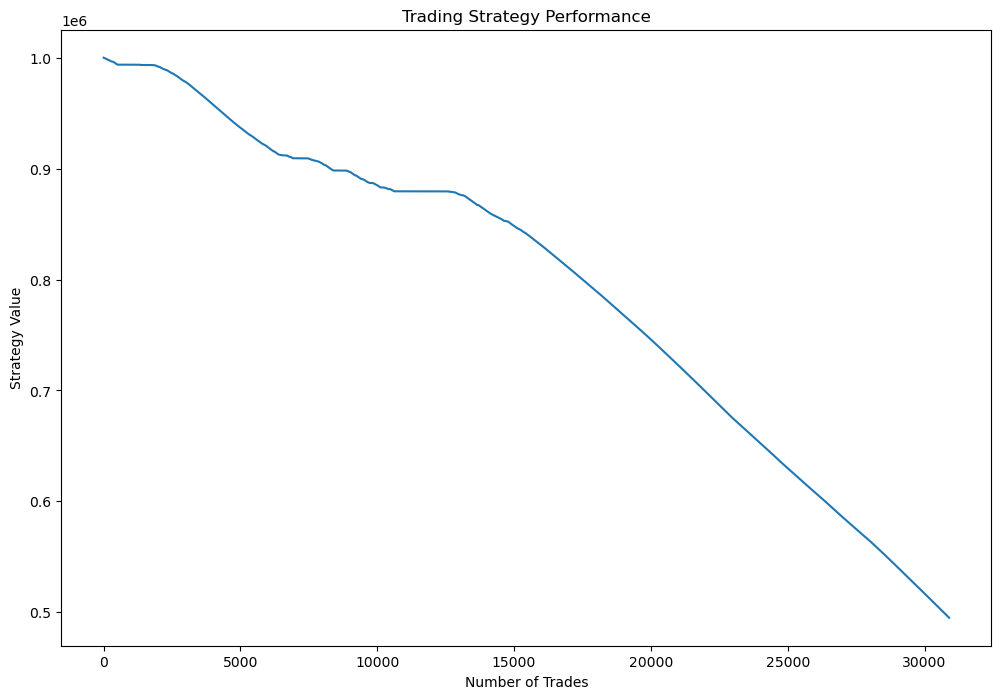

In [4]:
strategy.plot_results(best = True)

Now that we got our best model, we are going to train it on the whole training dataset and then test it on the test dataset. To see if the model is good or not.

Buy Signal Accuracy: 1.0
Buy Signal F1 Score: 1.0
Sell Signal Accuracy: 1.0
Sell Signal F1 Score: 1.0
Final Portfolio Value: 24585.86494737785


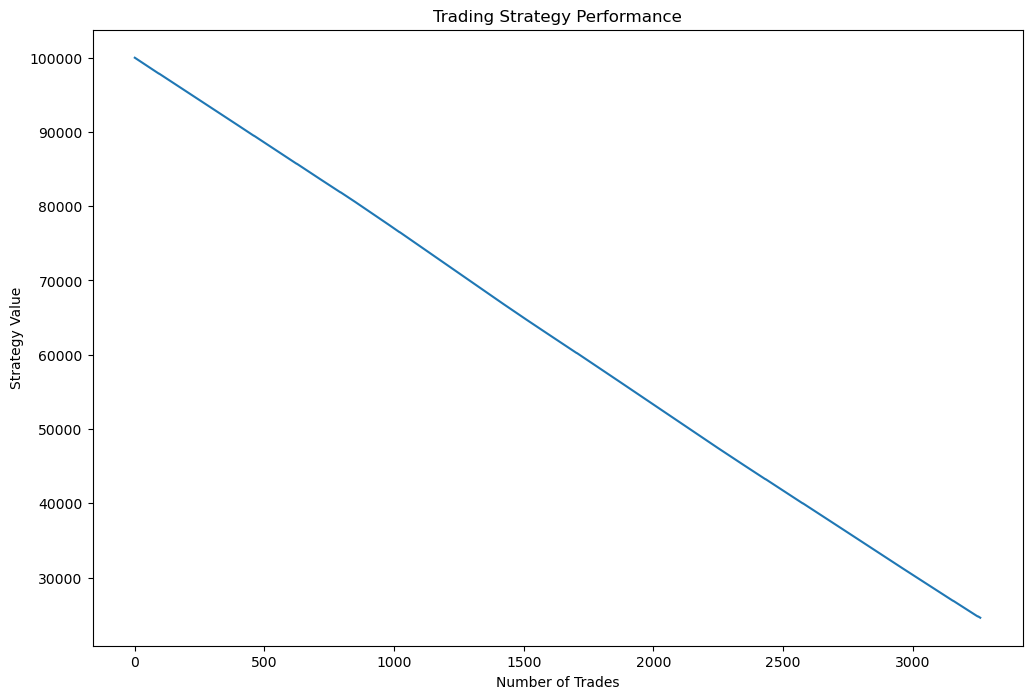

In [7]:
from ML_Test import Operation, TradingStrategy

strategy = TradingStrategy(train_path="data/aapl_project_train.csv", test_path="data/aapl_project_test.csv")
strategy.train_model()
strategy.plot_results()

#### Passive vs Active
Let's compare it with a passive strategy.

The passive asset return is: 2.41%
The trading strategy return is: -97.54%


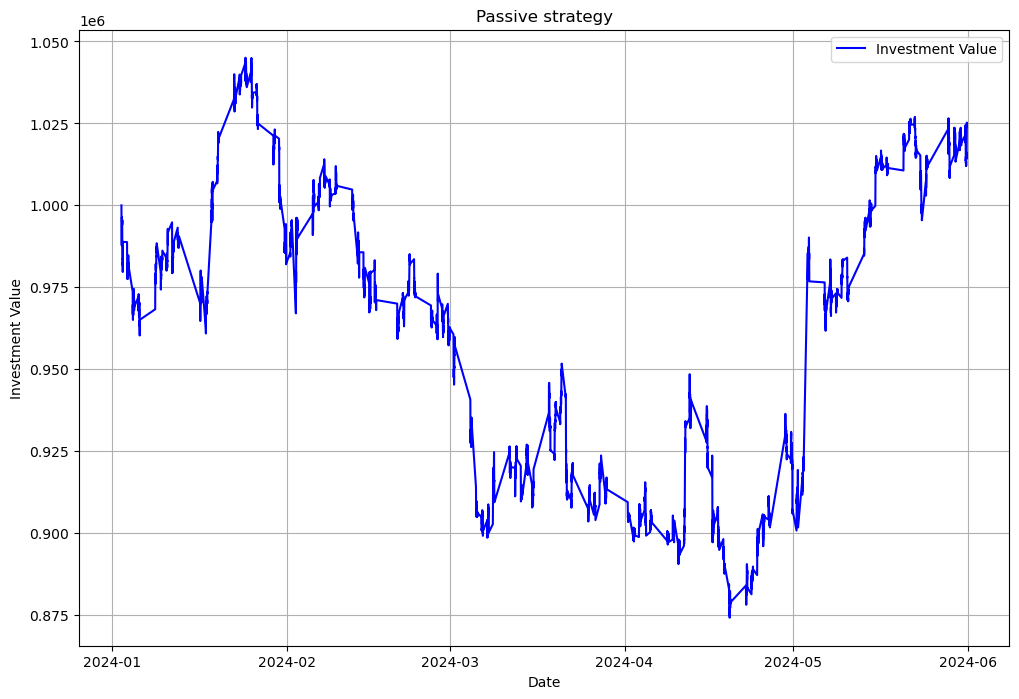

The final value of the investment: $1,024,077.16


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data/aapl_project_test.csv")
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Get first and last close data
primer_cierre = data.iloc[0]['Close']
ultimo_cierre = data.iloc[-1]['Close']

# Get asset yeild
rend_pasivo = (ultimo_cierre - primer_cierre) / primer_cierre
print("The passive asset return is: {:.2%}".format(rend_pasivo))

# Compare with used strategy
cash = 1000000
cashfinal = 24585.86494737785 # Change this to the value gotten on the trading strategy of the last code.
rend_estrategia = (cashfinal - cash) / cash
print("The trading strategy return is: {:.2%}".format(rend_estrategia))

# Sort data
data = data.sort_values(by='Datetime')

# Rend
data['Returns'] = data['Close'].pct_change().fillna(0)

# See the value passive
initial_investment = cash
data['Investment_Value'] = (1 + data['Returns']).cumprod() * initial_investment

# Graficar el rendimiento de la inversión
plt.figure(figsize=(12, 8))
plt.plot(data['Datetime'], data['Investment_Value'], label='Investment Value', color='blue')
plt.title('Passive strategy')
plt.xlabel('Date')
plt.ylabel('Investment Value')
plt.legend()
plt.grid(True)
plt.show()

valor_final = data['Investment_Value'].iloc[-1]
print("The final value of the investment: ${:,.2f}".format(valor_final))

### Bitcoin 1 minute interval

First we are going to test the Machine Learning models and see which one is better. We are going to try 4 different scenarios:

- Each model alone (3 total).
- Using all of them at the same time.

The next code is going to optimize each model and test this 4 scenarios.

It's also important to say, that first we are going to train and test the models with the training datase, splitting 80% train and 20% test.

In [15]:
from M_L import Operation, TradingStrategy
strategy = TradingStrategy('B1')
strategy.optimize_and_fit_models()
strategy.run_combinations()

[I 2024-06-18 09:30:33,176] A new study created in memory with name: no-name-e50b889b-756a-4763-8bf8-c7017a11fd59
[I 2024-06-18 09:34:26,995] Trial 0 finished with value: 0.6343482587064676 and parameters: {'C': 4.469173408415177, 'l1_ratio': 0.7946107275219922, 'fit_intercept': False}. Best is trial 0 with value: 0.6343482587064676.
[I 2024-06-18 09:38:19,765] Trial 1 finished with value: 0.6345228149739429 and parameters: {'C': 0.0027607351194547693, 'l1_ratio': 0.7333553847765872, 'fit_intercept': True}. Best is trial 1 with value: 0.6345228149739429.
[I 2024-06-18 09:42:12,659] Trial 2 finished with value: 0.6343463291340776 and parameters: {'C': 401.80096084573273, 'l1_ratio': 0.22983429276223832, 'fit_intercept': False}. Best is trial 1 with value: 0.6345228149739429.
[I 2024-06-18 09:46:05,537] Trial 3 finished with value: 0.6343735074032797 and parameters: {'C': 19.95408583270884, 'l1_ratio': 0.4820825798127514, 'fit_intercept': True}. Best is trial 1 with value: 0.634522814973

Using: ['Logistic'] for ML
Using: ['XGBoost'] for ML
Using: ['SVM'] for ML
Using: ['Logistic', 'XGBoost', 'SVM'] for ML
The best one was: ['Logistic'] with a value of: 259957.70275001685


Let's see the performance of how we did on a graph.

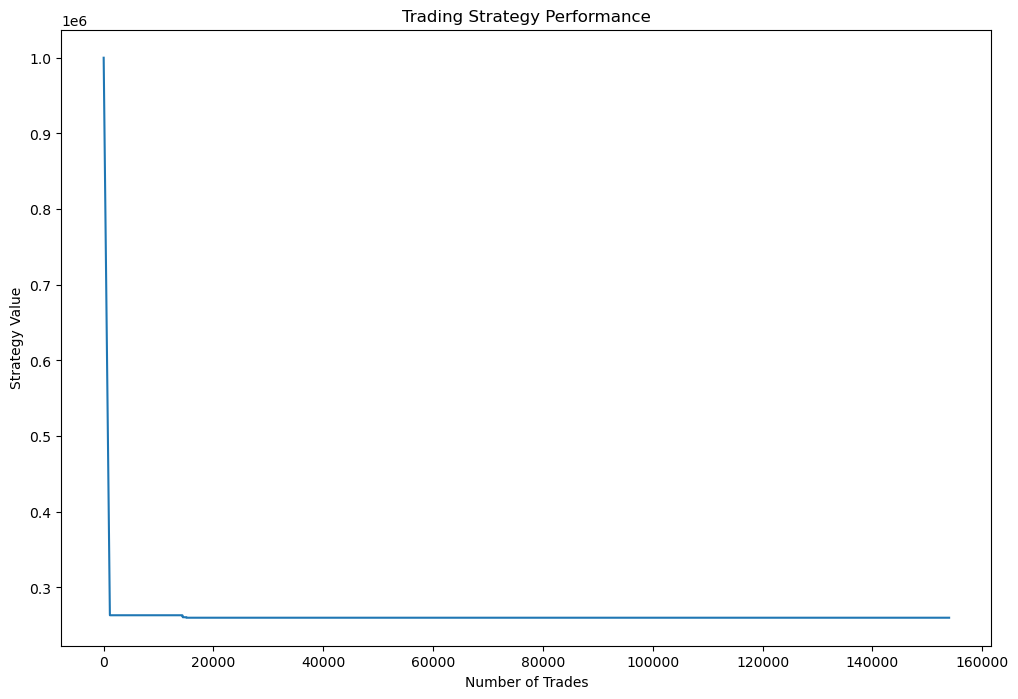

In [16]:
strategy.plot_results(best = True)

Let's optimize our Stop Loss, Take Profit and Number of Shares. Looking to get a better performance.

In [17]:
strategy.optimize_trade_parameters()

[I 2024-06-18 14:05:25,335] A new study created in memory with name: no-name-627d2e62-dfa9-457f-86b1-13ed792ffb72
[I 2024-06-18 14:05:28,083] Trial 0 finished with value: 1000000.0 and parameters: {'stop_loss_pct': 0.8224038701611075, 'take_profit_pct': 1.0939465700462732, 'n_shares': 142}. Best is trial 0 with value: 1000000.0.
[I 2024-06-18 14:05:30,415] Trial 1 finished with value: 1000000.0 and parameters: {'stop_loss_pct': 0.9124851605983448, 'take_profit_pct': 1.1282969686834792, 'n_shares': 61}. Best is trial 0 with value: 1000000.0.
[I 2024-06-18 14:05:32,648] Trial 2 finished with value: 1000000.0 and parameters: {'stop_loss_pct': 0.937083760246608, 'take_profit_pct': 1.055524682502246, 'n_shares': 69}. Best is trial 0 with value: 1000000.0.
[I 2024-06-18 14:05:34,892] Trial 3 finished with value: 1000000.0 and parameters: {'stop_loss_pct': 0.8902833407828168, 'take_profit_pct': 1.0931805602461504, 'n_shares': 62}. Best is trial 0 with value: 1000000.0.
[I 2024-06-18 14:05:37,

Best params: {'stop_loss_pct': 0.8224038701611075, 'take_profit_pct': 1.0939465700462732, 'n_shares': 142}


Let's see it on a graph.

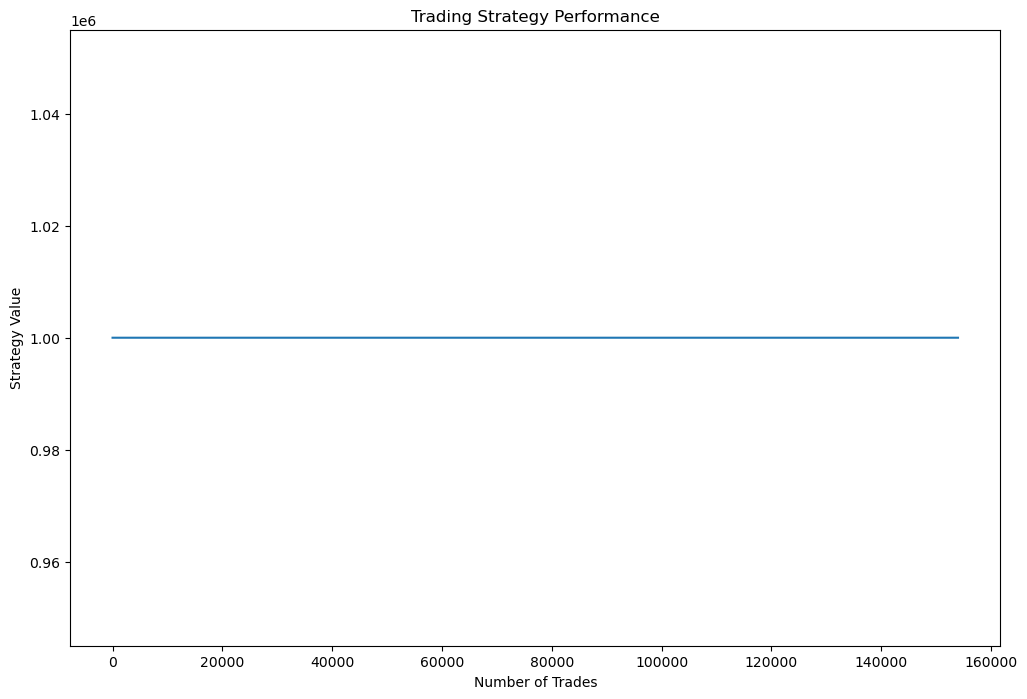

In [18]:
strategy.plot_results(best = True)

Now that we got our best model, we are going to train it on the whole training dataset and then test it on the test dataset. To see if the model is good or not.

Buy Signal Accuracy: 1.0
Buy Signal F1 Score: 1.0
Sell Signal Accuracy: 1.0
Sell Signal F1 Score: 1.0
Final Portfolio Value: -433026887.62500596


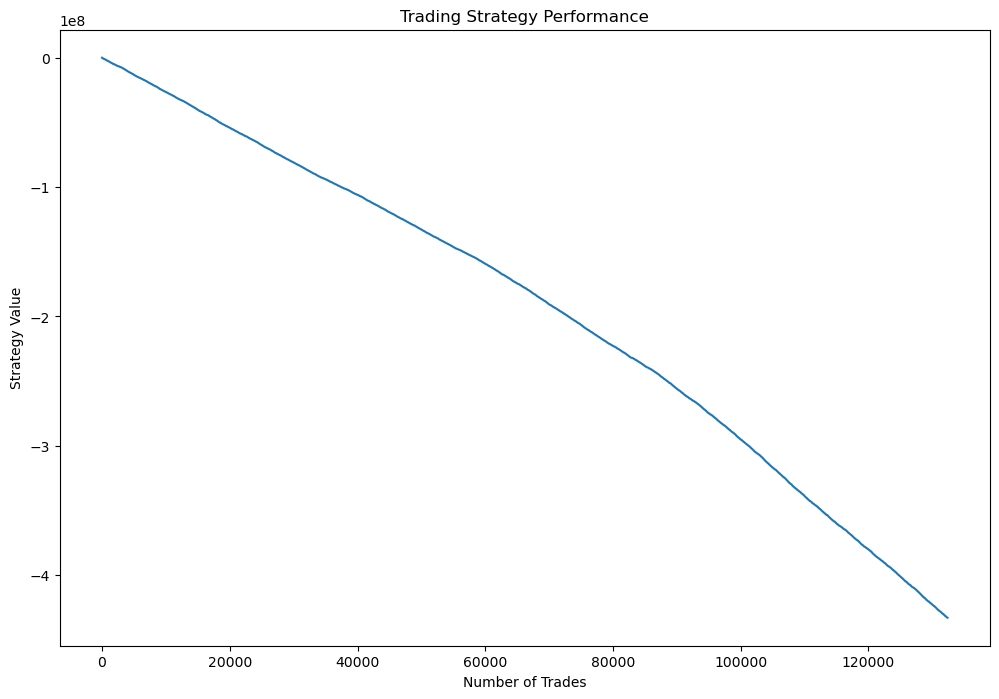

In [19]:
from ML_Test import Operation, TradingStrategy

strategy = TradingStrategy(train_path="data/btc_project_1m_train.csv", test_path="data/btc_project_1m_test.csv")
strategy.train_model()
strategy.plot_results()

#### Passive vs Active

Let's compare it with a passive strategy.

The passive asset return is: 68.89%
The trading strategy return is: -43402.69%


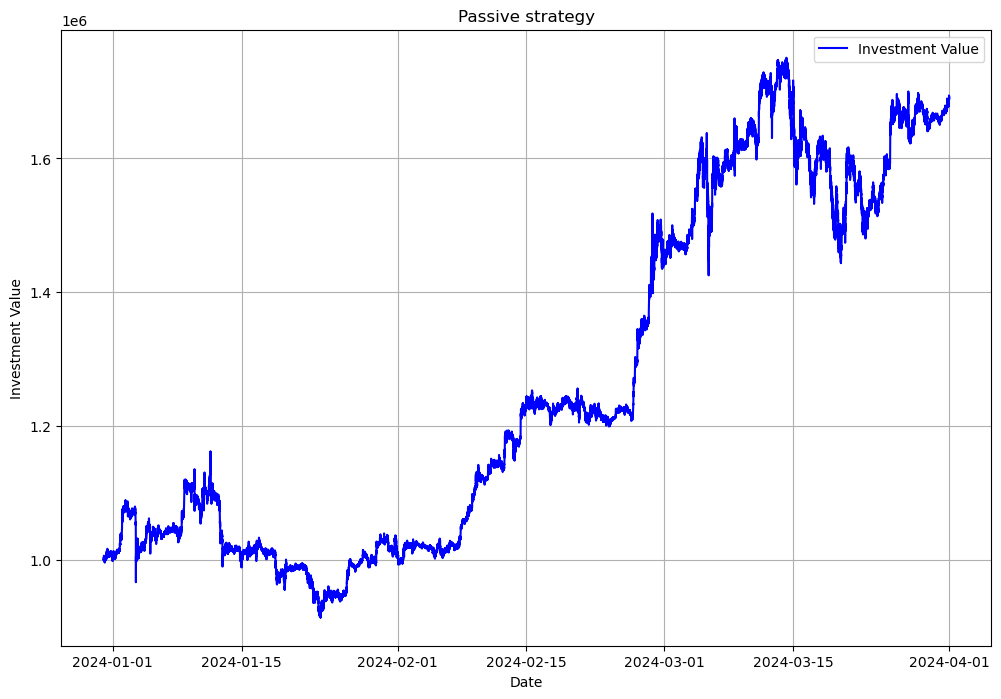

The final value of the investment: $1,688,924.83


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data/btc_project_1m_test.csv")
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Get first and last close data
primer_cierre = data.iloc[0]['Close']
ultimo_cierre = data.iloc[-1]['Close']

# Get asset yeild
rend_pasivo = (ultimo_cierre - primer_cierre) / primer_cierre
print("The passive asset return is: {:.2%}".format(rend_pasivo))

# Compare with used strategy
cash = 1000000
cashfinal = -433026887.62500596 # Change this to the value gotten on the trading strategy of the last code.
rend_estrategia = (cashfinal - cash) / cash
print("The trading strategy return is: {:.2%}".format(rend_estrategia))

# Sort data
data = data.sort_values(by='Datetime')

# Rend
data['Returns'] = data['Close'].pct_change().fillna(0)

# See the value passive
initial_investment = cash
data['Investment_Value'] = (1 + data['Returns']).cumprod() * initial_investment

# Graficar el rendimiento de la inversión
plt.figure(figsize=(12, 8))
plt.plot(data['Datetime'], data['Investment_Value'], label='Investment Value', color='blue')
plt.title('Passive strategy')
plt.xlabel('Date')
plt.ylabel('Investment Value')
plt.legend()
plt.grid(True)
plt.show()

valor_final = data['Investment_Value'].iloc[-1]
print("The final value of the investment: ${:,.2f}".format(valor_final))

### Bitcoin 5 minutes intervals

First we are going to test the Machine Learning models and see which one is better. We are going to try 4 different scenarios:

- Each model alone (3 total).
- Using all of them at the same time.
- 
The next code is going to optimize each model and test this 4 scenarios.

It's also important to say, that first we are going to train and test the models with the training datase, splitting 80% train and 20% test.

In [ ]:
from M_L import Operation, TradingStrategy
strategy = TradingStrategy('B5')
strategy.optimize_and_fit_models()
strategy.run_combinations()

Let's see the performance of how we did on a graph.

In [ ]:
strategy.plot_results(best = True)

Let's optimize our Stop Loss, Take Profit and Number of Shares. Looking to get a better performance.

In [ ]:
strategy.optimize_trade_parameters()

Let's see it on a graph.

In [ ]:
strategy.plot_results(best = True)

Now that we got our best model, we are going to train it on the whole training dataset and then test it on the test dataset. To see if the model is good or not.

In [ ]:
from ML_Test import Operation, TradingStrategy

strategy = TradingStrategy(train_path="data/btc_project_train.csv", test_path="data/btc_project_test.csv")
strategy.train_model()
strategy.plot_results()

#### Passive vs Active

Let's compare it with a passive strategy.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data/btc_project_test.csv")
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Get first and last close data
primer_cierre = data.iloc[0]['Close']
ultimo_cierre = data.iloc[-1]['Close']

# Get asset yeild
rend_pasivo = (ultimo_cierre - primer_cierre) / primer_cierre
print("The passive asset return is: {:.2%}".format(rend_pasivo))

# Compare with used strategy
cash = 1000000
cashfinal = 24585.86494737785 # Change this to the value gotten on the trading strategy of the last code.
rend_estrategia = (cashfinal - cash) / cash
print("The trading strategy return is: {:.2%}".format(rend_estrategia))

# Sort data
data = data.sort_values(by='Datetime')

# Rend
data['Returns'] = data['Close'].pct_change().fillna(0)

# See the value passive
initial_investment = cash
data['Investment_Value'] = (1 + data['Returns']).cumprod() * initial_investment

# Graficar el rendimiento de la inversión
plt.figure(figsize=(12, 8))
plt.plot(data['Datetime'], data['Investment_Value'], label='Investment Value', color='blue')
plt.title('Passive strategy')
plt.xlabel('Date')
plt.ylabel('Investment Value')
plt.legend()
plt.grid(True)
plt.show()

valor_final = data['Investment_Value'].iloc[-1]
print("The final value of the investment: ${:,.2f}".format(valor_final))